# import all the library which are needed in this project

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# loading all 3 dataset in different different vaiable

In [3]:
df_customer=pd.read_csv('/content/drive/MyDrive/Zeotap Data intern project/Customers.csv')
df_product=pd.read_csv('/content/drive/MyDrive/Zeotap Data intern project/Products.csv')
df_transaction=pd.read_csv('/content/drive/MyDrive/Zeotap Data intern project/Transactions.csv')

In [4]:
df_customer.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [5]:
df_product.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [6]:
df_transaction.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


#check for missing value

In [7]:
print(df_customer.isnull().sum())
print(df_product.isnull().sum())
print(df_transaction.isnull().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


# remove duplicate value if available

In [8]:
df_customer.drop_duplicates(inplace=True)
df_product.drop_duplicates(inplace=True)
df_transaction.drop_duplicates(inplace=True)


In [9]:
print(df_customer.info())
print(df_product.describe())
print(df_transaction.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000


# convert column into appropriate Data Types

In [10]:
df_customer['SignupDate'] = pd.to_datetime(df_customer['SignupDate'])
df_transaction['TransactionDate'] = pd.to_datetime(df_transaction['TransactionDate'])


In [11]:
print(df_customer.info())
print(df_transaction.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    200 non-null    object        
 1   CustomerName  200 non-null    object        
 2   Region        200 non-null    object        
 3   SignupDate    200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6 

In [12]:
print(df_customer)


    CustomerID        CustomerName         Region SignupDate
0        C0001    Lawrence Carroll  South America 2022-07-10
1        C0002      Elizabeth Lutz           Asia 2022-02-13
2        C0003      Michael Rivera  South America 2024-03-07
3        C0004  Kathleen Rodriguez  South America 2022-10-09
4        C0005         Laura Weber           Asia 2022-08-15
..         ...                 ...            ...        ...
195      C0196         Laura Watts         Europe 2022-06-07
196      C0197    Christina Harvey         Europe 2023-03-21
197      C0198         Rebecca Ray         Europe 2022-02-27
198      C0199      Andrea Jenkins         Europe 2022-12-03
199      C0200         Kelly Cross           Asia 2023-06-11

[200 rows x 4 columns]


In [13]:
merged_data=df_transaction.merge(df_customer, on='CustomerID').merge(df_product,on='ProductID')
merged_data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


<ipython-input-14-adcc3d405267>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_customer,x='Region',palette='viridis')


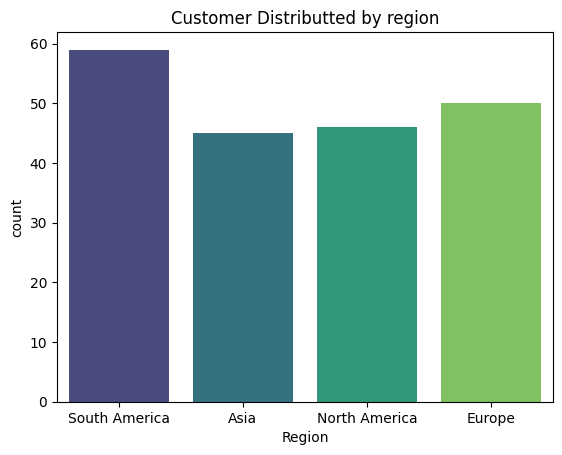

In [14]:
sns.countplot(data=df_customer,x='Region',palette='viridis')
plt.title('Customer Distributted by region')
plt.show()

In [15]:
#calculate total revenue generating from each customer
Customer_revenue=merged_data.groupby('CustomerID')['TotalValue'].sum()
#sort customer by revenue and calculate top 10% contribution
total_revenue= Customer_revenue.sum()
top_10_customer=Customer_revenue.sort_values(ascending=False).head(10)
print(top_10_customer)

CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
C0188     7111.32
C0059     7073.28
C0028     6819.57
C0099     6715.72
C0165     6708.10
Name: TotalValue, dtype: float64


In [16]:
top_10_details = df_customer[df_customer["CustomerID"].isin(top_10_customer.index)].copy()
print(top_10_details)


    CustomerID          CustomerName         Region SignupDate
27       C0028         Jennifer Pena           Asia 2024-06-29
53       C0054          Bruce Rhodes           Asia 2024-09-29
58       C0059  Mrs. Kimberly Wright  North America 2024-04-07
64       C0065          Gerald Hines  North America 2024-07-10
81       C0082          Aimee Taylor  South America 2022-05-13
98       C0099          Rodney Eaton  South America 2023-01-29
140      C0141          Paul Parsons         Europe 2023-02-23
155      C0156         William Adams  North America 2023-08-19
164      C0165         Juan Mcdaniel  South America 2022-04-09
187      C0188             Anna Ball  South America 2022-05-17


# 1) Customer Segmentation By Revenue

> Add blockquote



In [17]:
# Calculate total revenue per customer
Customer_revenue = merged_data.groupby('CustomerID')['TotalValue'].sum()

# Sort customers by revenue and get the top 10
top_10_customer = Customer_revenue.sort_values(ascending=False).head(10)

# Rename the column as 'Revenue' (converting Series to DataFrame)
top_10_customer = top_10_customer.reset_index()
top_10_customer.columns = ['CustomerID', 'Revenue']

# Print the updated DataFrame
print(top_10_customer)




  CustomerID   Revenue
0      C0141  10673.87
1      C0054   8040.39
2      C0065   7663.70
3      C0156   7634.45
4      C0082   7572.91
5      C0188   7111.32
6      C0059   7073.28
7      C0028   6819.57
8      C0099   6715.72
9      C0165   6708.10


<ipython-input-18-cd7dc813e8f1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Revenue', y='CustomerID', data=top_10_customer, palette='viridis')


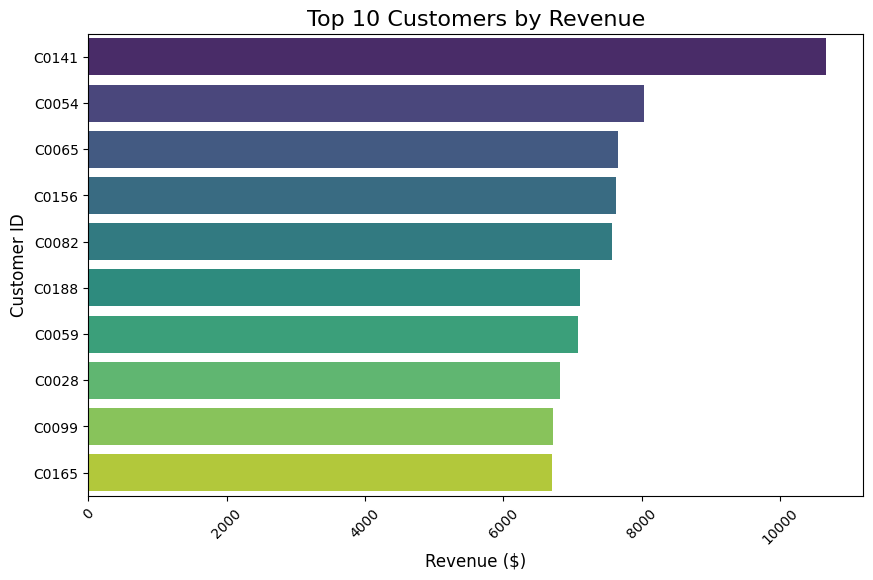

In [18]:
# Visualization of Top 10 Customers by Revenue

plt.figure(figsize=(10, 6))
sns.barplot(x='Revenue', y='CustomerID', data=top_10_customer, palette='viridis')
plt.title('Top 10 Customers by Revenue', fontsize=16)
plt.xlabel('Revenue ($)', fontsize=12)
plt.ylabel('Customer ID', fontsize=12)
plt.xticks(rotation=45)

plt.show()

# 2) High-Demand Product Categories

# Calculate sales contribution by category

In [27]:


category_sales = merged_data.groupby("Category")["TotalValue"].sum()
category_sales_percentage = (category_sales / category_sales.sum()) * 100
category_sales_percentage=category_sales_percentage.reset_index()
print("Sales Contribution by Category:")

category_sales_percentage.columns=['Category','revenue%']
print(category_sales_percentage)

Sales Contribution by Category:
      Category   revenue%
0        Books  27.847639
1     Clothing  24.082859
2  Electronics  26.200676
3   Home Decor  21.868826


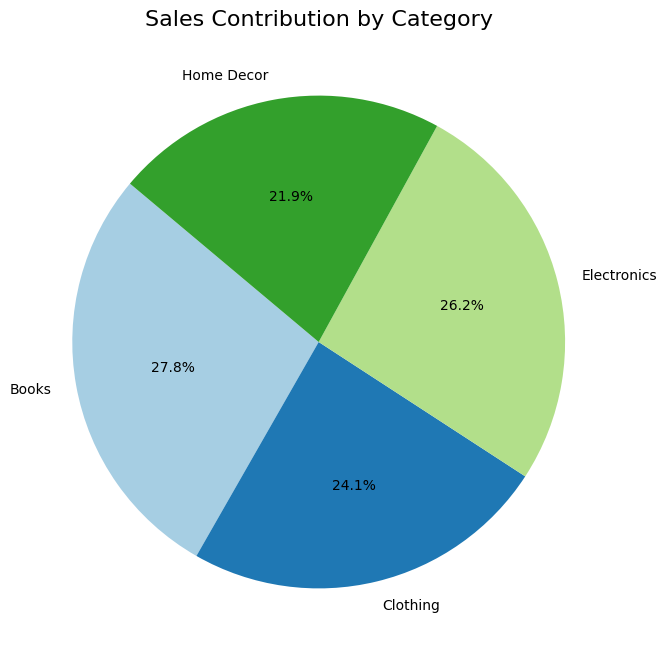

In [28]:
# Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(
    category_sales_percentage['revenue%'],
    labels=category_sales_percentage['Category'],
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Paired.colors
)

# Title for the Pie Chart
plt.title('Sales Contribution by Category', fontsize=16)

# Display the chart
plt.show()


# sales trend

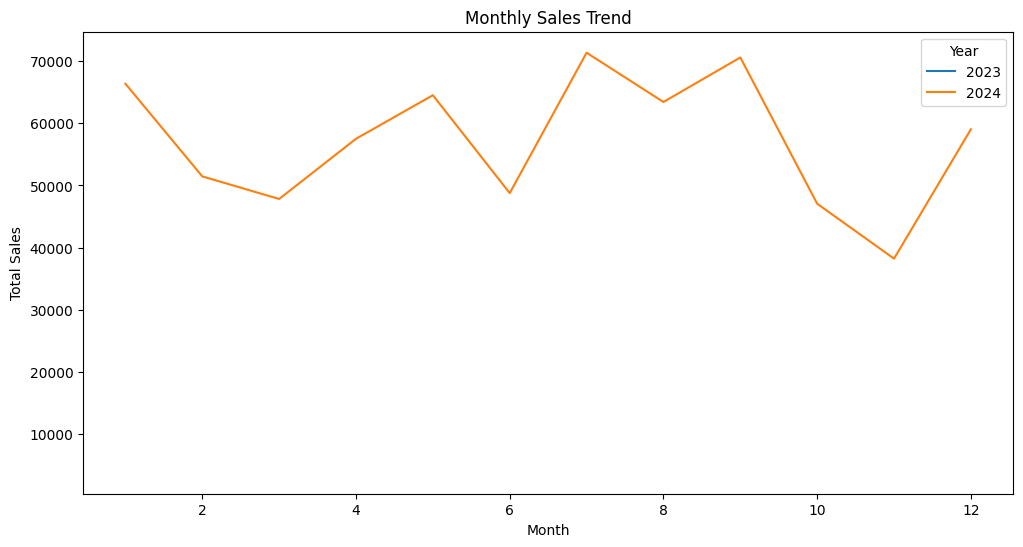

In [21]:
# Extract month and year from transaction date
df_transaction["Month"] = df_transaction["TransactionDate"].dt.month
df_transaction["Year"] = df_transaction["TransactionDate"].dt.year

# Group by month to find seasonal trends
monthly_sales = df_transaction.groupby(["Year", "Month"])["TotalValue"].sum()

# Plot sales trends
monthly_sales.unstack(level=0).plot(kind="line", figsize=(12, 6))
plt.title("Monthly Sales Trend")
plt.ylabel("Total Sales")
plt.xlabel("Month")
plt.legend(title="Year")
plt.show()


# 3) Top 5 underperforming Products

In [29]:
# Assuming merged_data is already available and contains the merged dataset

# Calculate total revenue for each product
product_sales = merged_data.groupby("ProductID")["TotalValue"].sum()

# Sort products by total revenue in ascending order to find underperforming products
underperforming_products = product_sales.sort_values(ascending=True).head(5)

# Merge with product details to get product names and other details
underperforming_product_details = merged_data[merged_data["ProductID"].isin(underperforming_products.index)]

# Get unique product details (ProductName, Category, and TotalRevenue)
underperforming_product_details = underperforming_product_details.drop_duplicates(subset=["ProductID"])

# Add the sales data (total revenue) to the product details
underperforming_product_details["TotalRevenue"] = underperforming_product_details["ProductID"].map(underperforming_products)

# Display the top 5 underperforming products
print("Top 5 Underperforming Products:")
print(underperforming_product_details[['ProductName',  'TotalRevenue']])


Top 5 Underperforming Products:
                  ProductName  TotalRevenue
151         HomeSense T-Shirt        730.35
660      ComfortLiving Laptop        647.76
760         ActiveWear Jacket        367.64
834  ActiveWear Running Shoes        244.66
846      SoundWave Smartwatch        337.68


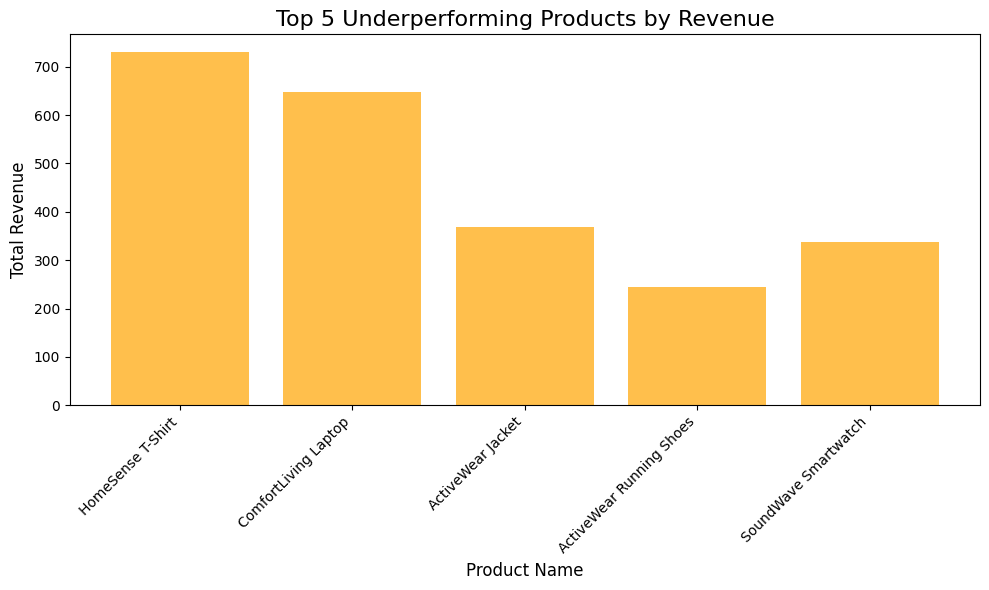

In [30]:


# Create a bar plot for the underperforming products
plt.figure(figsize=(10, 6))
plt.bar(
    underperforming_product_details['ProductName'],
    underperforming_product_details['TotalRevenue'],
    color='orange',
    alpha=0.7
)

# Add labels and title
plt.title('Top 5 Underperforming Products by Revenue', fontsize=16)
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit all elements


# Show the plot
plt.show()


#4) Regional Customer Growth

In [23]:
# Extract year from signup date
df_customer["SignupYear"] = df_customer["SignupDate"].dt.year

# Group by region and year to calculate customer growth
customer_growth = df_customer.groupby(["Region", "SignupYear"])["CustomerID"].count()

print("Customer Growth by Region and Year:")
print(customer_growth)


Customer Growth by Region and Year:
Region         SignupYear
Asia           2022          13
               2023          16
               2024          16
Europe         2022          16
               2023          19
               2024          15
North America  2022          10
               2023           8
               2024          28
South America  2022          25
               2023          14
               2024          20
Name: CustomerID, dtype: int64


#

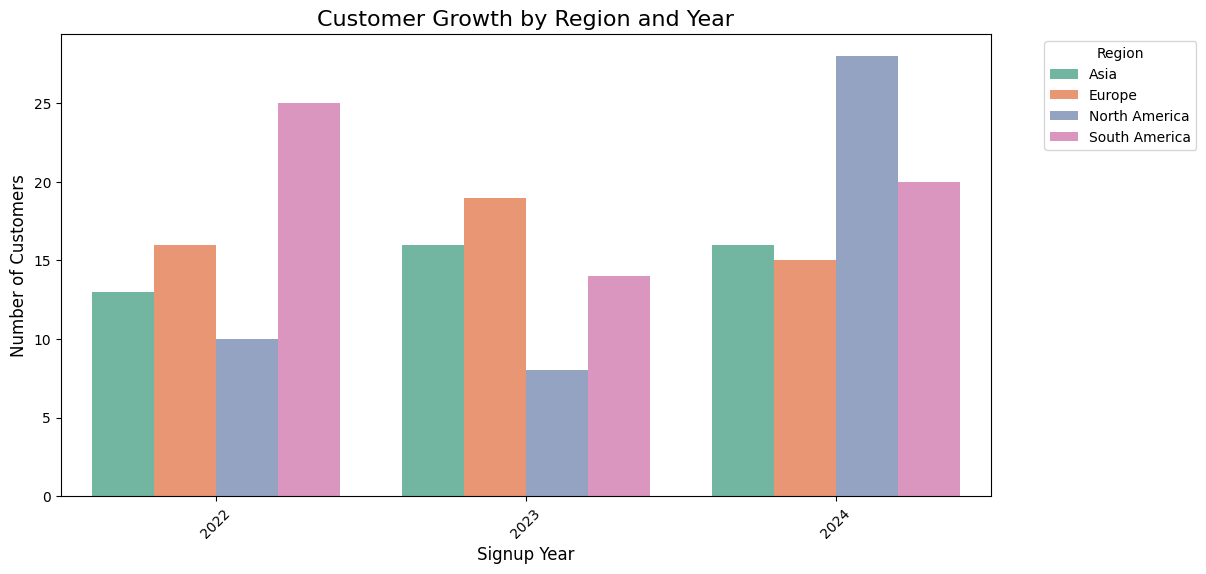

In [24]:
# Grouped bar plot for customer growth by region and year
customer_growth_df = customer_growth.reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='SignupYear', y='CustomerID', hue='Region', data=customer_growth_df, palette='Set2')

plt.title('Customer Growth by Region and Year', fontsize=16)
plt.xlabel('Signup Year', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


# 5) Transaction Pattens DayofWeek

DayOfWeek
Friday        87032.09
Monday       101984.33
Saturday      81399.74
Sunday        92605.93
Thursday      99202.71
Tuesday      108567.61
Wednesday    119203.15
Name: TotalValue, dtype: float64


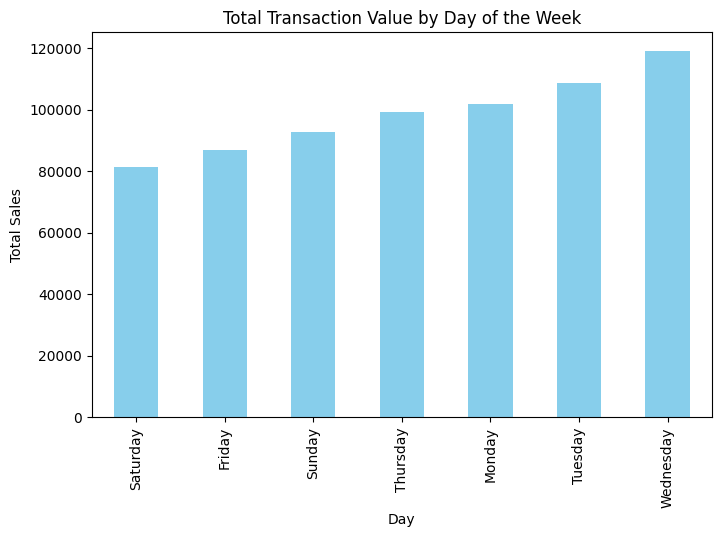

In [31]:
# Add day of the week to transaction data
df_transaction["DayOfWeek"] = df_transaction["TransactionDate"].dt.day_name()

# Calculate average transaction value per day
daily_transactions = df_transaction.groupby("DayOfWeek")["TotalValue"].sum()
print(daily_transactions)
daily_transactions.sort_values().plot(kind="bar", figsize=(8, 5), color="skyblue")
plt.title("Total Transaction Value by Day of the Week")
plt.xlabel("Day")
plt.ylabel("Total Sales")
plt.show()
